In [1]:
using Plots
# Borrowing heavily from D. Bindel's notes:
# https://github.com/dbindel/cs4220-s20/blob/master/lec/jupyter/2020-04-24.ipynb

In [2]:
f(x) = x * atan(x) - log(1.0 + x^2) / 2.0
g(x) = atan(x)
H(x) = 1.0 / (1.0 + x^2)

H (generic function with 1 method)

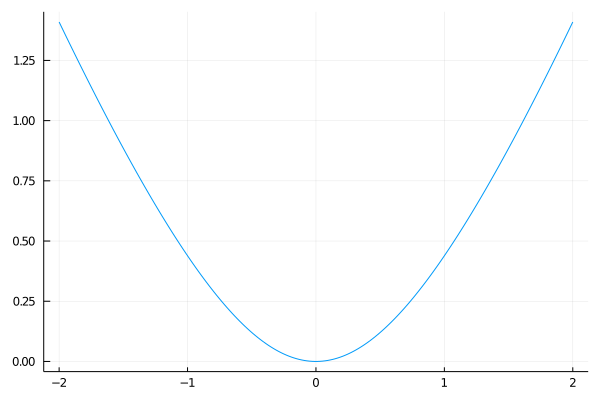

In [3]:
xs = collect(range(-2, 2, length=200));
fx = [f(x) for x in xs]
plot(xs, fx, legend=false)

┌ Warning: Skipped marker arg o.
└ @ Plots /Users/arb/.julia/packages/Plots/KN96c/src/args.jl:862


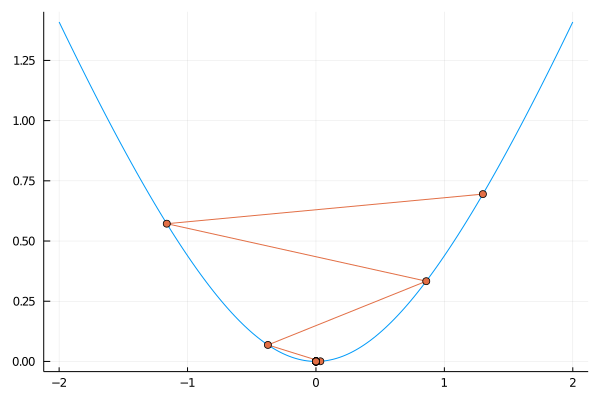

In [4]:
newton_xs = [1.3]
for k = 1:20
    xk = newton_xs[end]
    pk = - g(xk) / H(xk)
    push!(newton_xs, xk + pk)
end

plot(xs, fx, legend=false)
plot!(newton_xs, [f(x) for x in newton_xs], m="o")

┌ Warning: Skipped marker arg o.
└ @ Plots /Users/arb/.julia/packages/Plots/KN96c/src/args.jl:862


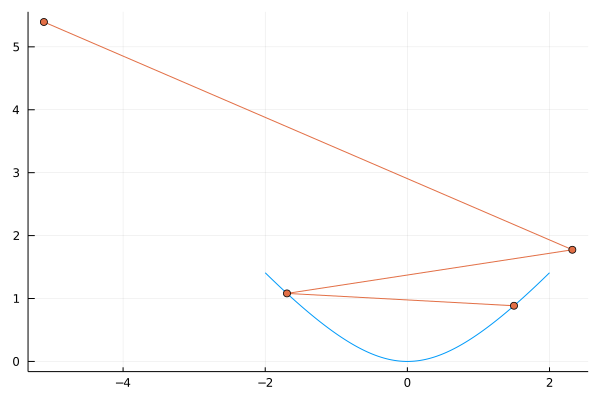

In [5]:
newton_xs = [1.5]
for k = 1:3
    xk = newton_xs[end]
    pk = -g(xk) / H(xk)
    push!(newton_xs, xk + pk)
end

plot(xs, fx, legend=false)
plot!(newton_xs, [f(x) for x in newton_xs], m="o")

In [6]:
function find_step_size(f, x, p)
   fx = f(x) 
    α = 1.0
    while f(x + α * p) > fx
        α /= 2.0
    end
    return α
end

find_step_size (generic function with 1 method)

┌ Warning: Skipped marker arg o.
└ @ Plots /Users/arb/.julia/packages/Plots/KN96c/src/args.jl:862


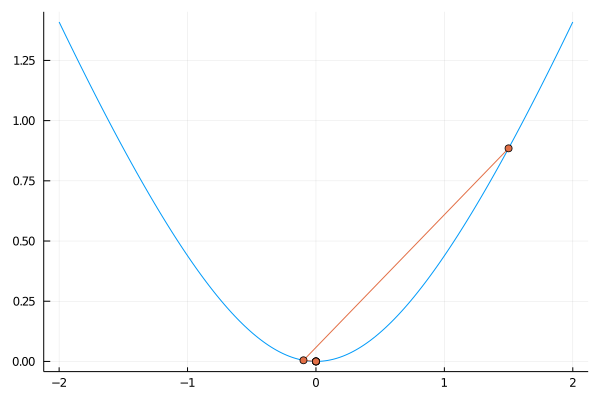

In [7]:
newton_xs = [1.5]
for k = 1:5
    xk = newton_xs[end]
    pk = -g(xk) / H(xk)
    αk = find_step_size(f, xk, pk)
    push!(newton_xs, xk + αk * pk)
end

plot(xs, fx, legend=false)
plot!(newton_xs, [f(x) for x in newton_xs], m="o")

In [8]:
f2(x) = 19.0 * x^2 - 4.0 * x^4 + (7.0 / 9.0) * x^6
g2(x) = 38.0 * x - 16 * x^3 + (14.0 / 3.0) *x^5
H2(x) = 38.0 - 48.0 *x^2 + (70.0 / 3.0) * x^4

H2 (generic function with 1 method)

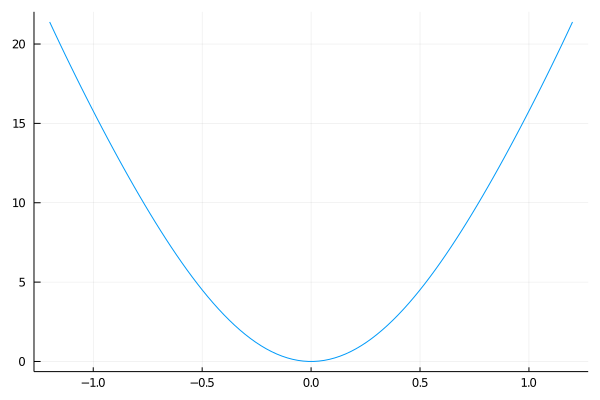

In [9]:
xs = collect(range(-1.2, 1.2, length=100));
fx = [f2(x) for x in xs]
plot(xs, fx, legend=false)

┌ Warning: Skipped marker arg o.
└ @ Plots /Users/arb/.julia/packages/Plots/KN96c/src/args.jl:862


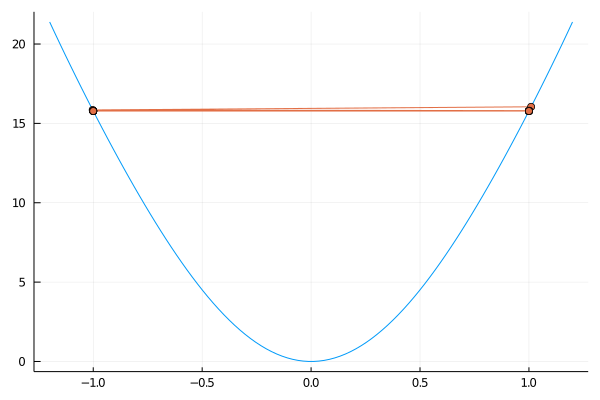

In [10]:
newton_xs = [1.01]
for k = 1:20
    xk = newton_xs[end]
    pk = -g2(xk) / H2(xk)
    αk = find_step_size(f2, xk, pk)
    push!(newton_xs, xk + αk * pk)
end

plot(xs, fx, legend=false)
plot!(newton_xs, [f2(x) for x in newton_xs], m="o")

In [11]:
newton_xs

21-element Array{Float64,1}:
  1.01
 -1.0026147192934818
  1.0009523442180164
 -1.0003685641604838
  1.0001455743253078
 -1.0000579410223966
  1.0000231306797278
 -1.0000092449845057
  1.000003696829684
 -1.000001478545734
  1.0000005913885184
 -1.0000002365506437
  1.000000094619496
 -1.0000000378476759
  1.0000000151390498
 -1.0000000060556167
  1.0000000024222466
 -1.0000000009688985
  1.0000000003875595
 -1.0000000001550242
  1.0000000000620097

In [12]:
function find_step_size_armijo(f, x, p, g, c1)
    fx = f(x) 
    α = 1.0
    factor = 0.9
    while f(x + α * p) > fx || f(x + α * p) > fx + c1 * α * g' * p
        α *= factor
    end
    return α
end

find_step_size_armijo (generic function with 1 method)

┌ Warning: Skipped marker arg o.
└ @ Plots /Users/arb/.julia/packages/Plots/KN96c/src/args.jl:862


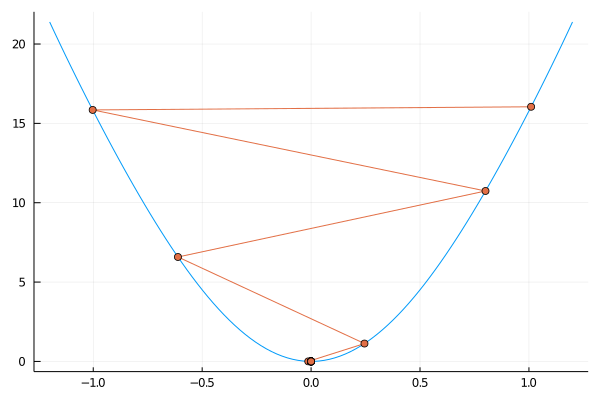

In [13]:
newton_xs = [1.01]
for k = 1:20
    xk = newton_xs[end]
    pk = -g2(xk) / H2(xk)
    αk = find_step_size_armijo(f2, xk, pk, g2(xk), 1e-3)
    push!(newton_xs, xk + αk * pk)
end

plot(xs, fx, legend=false)
plot!(newton_xs, [f2(x) for x in newton_xs], m="o")